In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/Hugo/machine-learning-water-quality/notebook/output/amostra_por_classificador.csv')

X = df.drop('WQI', axis=1)
y = df['WQI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [3]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)

model.fit(X_train, y_train)

c:\Users\Hugo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', random_state=42)

Accuracy: 0.6271186440677966
Confusion Matrix:
 [[23 26  1  0]
 [ 6 30 13  0]
 [ 0  4 27  7]
 [ 0  3  6 31]]
Classification Report:
               precision    recall  f1-score   support

           1     0.7931    0.4600    0.5823        50
           2     0.4762    0.6122    0.5357        49
           3     0.5745    0.7105    0.6353        38
           4     0.8158    0.7750    0.7949        40

    accuracy                         0.6271       177
   macro avg     0.6649    0.6394    0.6370       177
weighted avg     0.6636    0.6271    0.6288       177


ROC


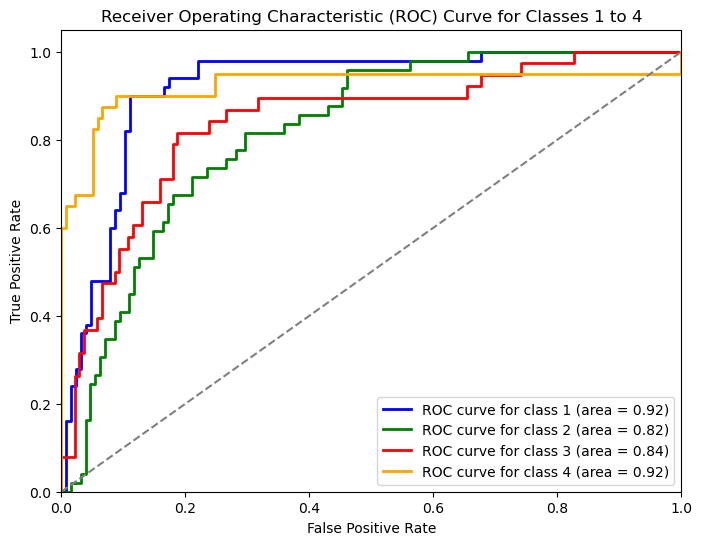

In [4]:
y_pred = model.predict(X_test)
y_scores = model.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, digits=4)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# # ROC
print('\nROC')
# Binarizando os rótulos para a abordagem one-vs-rest
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

# Calculando ROC e AUC para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotando as curvas ROC para cada classe
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red', 'orange']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve for class {i+1} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Classes 1 to 4')
plt.legend(loc="lower right")
plt.show()